# Linear Regression
(https://ko.wikipedia.org/wiki/%EC%84%A0%ED%98%95_%ED%9A%8C%EA%B7%80)

$$
H(x) = W(x) + b
$$
$$
cost(W,b) = \frac{1}{m} \sum_{i=0}^{m} ( h( x^i ) - y^i )^2
$$

In [1]:
import sys
sys.version

'3.6.0 (default, Jan 13 2017, 20:56:47) \n[GCC 5.4.0 20160609]'

In [2]:
import tensorflow as tf
tf.__version__

'1.0.0'

In [3]:
import matplotlib.pyplot as plt

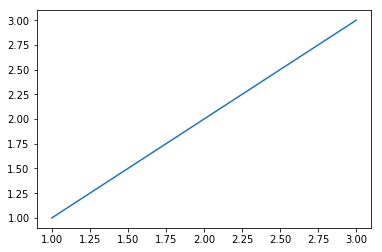

In [22]:
%matplotlib inline
x_data = [1, 2, 3]
y_data = [1, 2 ,3]

plt.plot(x_data,y_data)
plt.show()

$$
H(x) = W(x) + b
$$

In [5]:
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')
h = W * x_data + b

print(tf.random_normal([1]))


Tensor("random_normal_2:0", shape=(1,), dtype=float32)


$$
cost(W,b) = \frac{1}{m} \sum_{i=0}^{m} ( h( x^i ) - y^i )^2
$$

In [6]:
print(h)
cost = tf.reduce_mean(tf.square(h - y_data))
#t = [1., 2., 3., 4.]
#tf.reduce_mean(t) ==> 2.5

Tensor("add:0", shape=(3,), dtype=float32)


In [7]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

In [8]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [9]:
for step in range(2000):
    sess.run(train)
    if step % 20 == 0:
        print(step,sess.run(cost),sess.run(W), sess.run(b))

0 0.263906 [ 0.47970423] [ 0.75174206]
20 0.0894689 [ 0.64042497] [ 0.77635783]
40 0.0798951 [ 0.67029911] [ 0.74557966]
60 0.0725496 [ 0.68702942] [ 0.71108371]
80 0.0658906 [ 0.70185548] [ 0.67771715]
100 0.059843 [ 0.71587837] [ 0.64587188]
120 0.0543503 [ 0.72923207] [ 0.61551875]
140 0.0493618 [ 0.74195731] [ 0.58659166]
160 0.0448312 [ 0.75408435] [ 0.5590241]
180 0.0407164 [ 0.76564151] [ 0.5327521]
200 0.0369793 [ 0.7766555] [ 0.50771451]
220 0.0335852 [ 0.78715187] [ 0.48385376]
240 0.0305026 [ 0.79715496] [ 0.46111441]
260 0.0277029 [ 0.80668789] [ 0.43944377]
280 0.0251603 [ 0.81577283] [ 0.41879153]
300 0.022851 [ 0.82443082] [ 0.39910987]
320 0.0207536 [ 0.83268195] [ 0.38035321]
340 0.0188488 [ 0.8405453] [ 0.36247805]
360 0.0171187 [ 0.84803909] [ 0.34544289]
380 0.0155475 [ 0.85518068] [ 0.32920834]
400 0.0141205 [ 0.8619867] [ 0.31373677]
420 0.0128245 [ 0.86847281] [ 0.29899228]
440 0.0116474 [ 0.87465411] [ 0.28494066]
460 0.0105783 [ 0.88054484] [ 0.27154949]
480 0.

### With placeholder


In [10]:
x_data = [1., 2., 3.]
y_data = [2., 4., 6.]

W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

X = tf.placeholder(tf.float32,shape=[None])
Y = tf.placeholder(tf.float32,shape=[None])

h = W * X + b
cost = tf.reduce_mean(tf.square(h - Y))
a = tf.Variable(0.1)
init = tf.global_variables_initializer()
opt = tf.train.GradientDescentOptimizer(a)
train = opt.minimize(cost)

sess = tf.Session()
sess.run(init)

In [11]:
for step in range(2000):
    sess.run(train,feed_dict={X:x_data, Y:y_data})
    if step % 20 == 0:
        print(step,sess.run(cost,feed_dict={X:x_data, Y:y_data}),sess.run(W), sess.run(b))

0 0.491723 [ 1.85756636] [ 0.97638631]
20 0.0410794 [ 1.76459897] [ 0.53512192]
40 0.0155209 [ 1.8553046] [ 0.3289268]
60 0.00586423 [ 1.91105902] [ 0.20218347]
80 0.00221566 [ 1.94533014] [ 0.12427742]
100 0.000837142 [ 1.96639574] [ 0.07639039]
120 0.000316295 [ 1.97934425] [ 0.04695532]
140 0.000119502 [ 1.98730338] [ 0.02886227]
160 4.51513e-05 [ 1.99219573] [ 0.01774087]
180 1.7059e-05 [ 1.99520302] [ 0.01090488]
200 6.4456e-06 [ 1.99705136] [ 0.00670298]
220 2.43535e-06 [ 1.99818742] [ 0.00412019]
240 9.20429e-07 [ 1.99888587] [ 0.00253264]
260 3.47655e-07 [ 1.99931514] [ 0.00155679]
280 1.31418e-07 [ 1.99957907] [ 0.00095704]
300 4.96145e-08 [ 1.9997412] [ 0.00058819]
320 1.87606e-08 [ 1.99984086] [ 0.00036157]
340 7.07778e-09 [ 1.99990213] [ 0.00022221]
360 2.67287e-09 [ 1.99993992] [ 0.00013665]
380 1.00645e-09 [ 1.99996305] [  8.39866916e-05]
400 3.82443e-10 [ 1.99997735] [  5.16571417e-05]
420 1.44856e-10 [ 1.99998605] [  3.17412450e-05]
440 5.47971e-11 [ 1.99999142] [  1.95

## Predict value with feed

In [12]:
print( sess.run(h, feed_dict={X:[5]}) )

[ 10.]


In [13]:
print( sess.run(h, feed_dict={X:[2.3]}) )

[ 4.5999999]


### Cost minizied(desent algorithm)

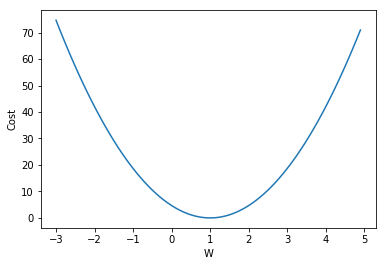

In [14]:
X = [1., 2., 3.]
Y = [1., 2., 3.]
m = n_samples = len(X)

W = tf.placeholder(tf.float32)
h = tf.multiply(X,W)

cost = tf.reduce_sum(tf.pow(h - Y, 2))/(m)
init = tf.global_variables_initializer()

W_val = []
cost_val = []

sess = tf.Session()
sess.run(init)
for i in range(-30, 50):
    curr_cost, curr_w = sess.run([cost,W], feed_dict={W: i*0.1})
    W_val.append(i*0.1)
    cost_val.append(curr_cost)
    
plt.plot(W_val, cost_val)
plt.ylabel('Cost')
plt.xlabel('W')

plt.show()

### minimized(Gradient descent)

In [15]:
x_data = [1., 2., 3.]
y_data = [1., 2., 3.]

W = tf.Variable(5.0)
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

h = W * X

### Derivative 
$$
cost(W) = \frac{1}{2m} \sum_{i=1}^{m} (W( x^i) - y^i)^2
$$

$$
Gradient descent algorithm
 W := W - a \frac{ \partial}{\partial{m}} cost(W)
$$

$$
W:= W - a \frac{1}{m} \sum_{i=1}^{m} (W( x^i) - y^i)x^i
$$

In [16]:
cost = tf.reduce_mean(tf.square(h - Y))
descent = W - tf.multiply(0.1, tf.reduce_mean(tf.multiply((tf.multiply(W,X) - Y), X)))
update = W.assign(descent)

init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

for step in range(100):
    sess.run(update, feed_dict={X:x_data, Y:y_data})
    print(step,sess.run(cost, feed_dict={X:x_data, Y:y_data}), sess.run(W))


0 21.2385 3.13333
1 6.04118 2.13778
2 1.71838 1.60681
3 0.488784 1.32363
4 0.139032 1.17261
5 0.0395468 1.09206
6 0.0112489 1.0491
7 0.00319967 1.02618
8 0.000910135 1.01397
9 0.000258876 1.00745
10 7.36358e-05 1.00397
11 2.09459e-05 1.00212
12 5.95745e-06 1.00113
13 1.69446e-06 1.0006
14 4.82022e-07 1.00032
15 1.37134e-07 1.00017
16 3.8992e-08 1.00009
17 1.11053e-08 1.00005
18 3.15166e-09 1.00003
19 8.92366e-10 1.00001
20 2.54924e-10 1.00001
21 7.31622e-11 1.0
22 2.14868e-11 1.0
23 6.63173e-12 1.0
24 1.80478e-12 1.0
25 5.16328e-13 1.0
26 2.65269e-13 1.0
27 9.9476e-14 1.0
28 0.0 1.0
29 0.0 1.0
30 0.0 1.0
31 0.0 1.0
32 0.0 1.0
33 0.0 1.0
34 0.0 1.0
35 0.0 1.0
36 0.0 1.0
37 0.0 1.0
38 0.0 1.0
39 0.0 1.0
40 0.0 1.0
41 0.0 1.0
42 0.0 1.0
43 0.0 1.0
44 0.0 1.0
45 0.0 1.0
46 0.0 1.0
47 0.0 1.0
48 0.0 1.0
49 0.0 1.0
50 0.0 1.0
51 0.0 1.0
52 0.0 1.0
53 0.0 1.0
54 0.0 1.0
55 0.0 1.0
56 0.0 1.0
57 0.0 1.0
58 0.0 1.0
59 0.0 1.0
60 0.0 1.0
61 0.0 1.0
62 0.0 1.0
63 0.0 1.0
64 0.0 1.0
65 0.0 1.0
66 

In [17]:
#compute_gradient and apply_gradient
"""
gradient = tf.reduce_mean((W*X-Y)*X)*2

cost = tf.reduce_mean(tf.square(h-Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

gvs = optimizer.compute_gradients(cost)
apply_gradients = optimizer.apply_gradients(gvs)
"""

'\ngradient = tf.reduce_mean((W*X-Y)*X)*2\n\ncost = tf.reduce_mean(tf.square(h-Y))\n\noptimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)\n\ngvs = optimizer.compute_gradients(cost)\napply_gradients = optimizer.apply_gradients(gvs)\n'

## Multi variable Linear regression
$$
H(x_1,x_2) = w_1x_1 + w_2x_2 + w_3x_3
$$


In [18]:
x1_data = [73,93,89,96,73]
x2_data = [80,88,91,98,66]
x3_data = [75,93,90,100,70]
y_data = [152,185,180,196,142]

In [19]:
x1 = tf.placeholder(tf.float32)
x2 = tf.placeholder(tf.float32)
x3 = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

W1 = tf.Variable(tf.random_uniform([1], -1.0, 1.0), name='weight1')
W2 = tf.Variable(tf.random_uniform([1], -1.0, 1.0), name='weight2')
W3 = tf.Variable(tf.random_uniform([1], -1.0, 1.0), name='weight3')
b = tf.Variable(tf.random_uniform([1], -1.0, 1.0),name='bias')

h = W1 * x1 + W2 * x2 + W3*x3 + b

cost = tf.reduce_mean(tf.square(h - y))
opt = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = opt.minimize(cost)

init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

for step in range(2000):
    cost_val, h_val, _ = sess.run([cost, h, train] , feed_dict={x1:x1_data, x2: x2_data, x3:x3_data, y:y_data})
    if step % 20 == 0:
         print(step,cost_val, h_val)

0 86713.5 [-107.59642792 -130.98194885 -128.1579895  -139.57611084 -100.40460205]
20 3.64122 [ 153.66677856  183.06309509  181.26239014  197.37599182  139.13829041]
40 3.60608 [ 153.65539551  183.07545471  181.26107788  197.37561035  139.15332031]
60 3.57137 [ 153.64170837  183.08486938  181.25692749  197.37216187  139.1660614 ]
80 3.537 [ 153.62811279  183.09425354  181.25282288  197.36872864  139.17875671]
100 3.503 [ 153.61457825  183.10359192  181.24873352  197.36531067  139.19137573]
120 3.46935 [ 153.60110474  183.112854    181.24465942  197.36192322  139.20394897]
140 3.43609 [ 153.58770752  183.12207031  181.24060059  197.35855103  139.21643066]
160 3.40319 [ 153.57440186  183.1312561   181.23658752  197.35517883  139.22883606]
180 3.3706 [ 153.56115723  183.14038086  181.23258972  197.3518219   139.24121094]
200 3.3384 [ 153.54800415  183.14945984  181.22862244  197.34851074  139.25350952]
220 3.30653 [ 153.53489685  183.15847778  181.22465515  197.34518433  139.26573181]
240 

In [20]:
x_data = [ [73,80,75], [93,88,93], [89,91,90],[96,98,100], [73,66,70]]
y_data = [[152],[185],[180],[196],[142]]


X = tf.placeholder(tf.float32, shape=[None,3])
Y = tf.placeholder(tf.float32, shape=[None,1])

W = tf.Variable(tf.random_normal([3,1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

h = tf.matmul(X,W)+b

cost = tf.reduce_mean(tf.square(h - y_data))
a = tf.Variable(0.1)
opt = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = opt.minimize(cost)

init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

for step in range(3000):
    cost_val, h_val, _ =  sess.run([cost,h,train], feed_dict={X:x_data, Y: y_data}) 
    if step % 20 == 0:
        print(step, cost_val, h_val)

0 182.278 [[ 166.56640625]
 [ 196.84835815]
 [ 196.13084412]
 [ 210.44512939]
 [ 151.48468018]]
20 3.98919 [[ 154.70605469]
 [ 182.61924744]
 [ 182.09700012]
 [ 195.1650238 ]
 [ 140.63594055]]
40 3.95618 [[ 154.69215393]
 [ 182.62850952]
 [ 182.0925293 ]
 [ 195.16259766]
 [ 140.6474762 ]]
60 3.92349 [[ 154.6783905 ]
 [ 182.6378479 ]
 [ 182.0881958 ]
 [ 195.16027832]
 [ 140.6590271 ]]
80 3.89116 [[ 154.66471863]
 [ 182.6471405 ]
 [ 182.08390808]
 [ 195.15800476]
 [ 140.67053223]]
100 3.8592 [[ 154.65113831]
 [ 182.65637207]
 [ 182.07963562]
 [ 195.15574646]
 [ 140.68196106]]
120 3.82756 [[ 154.63761902]
 [ 182.66557312]
 [ 182.07540894]
 [ 195.15351868]
 [ 140.69332886]]
140 3.79625 [[ 154.62414551]
 [ 182.67469788]
 [ 182.07115173]
 [ 195.15126038]
 [ 140.7046051 ]]
160 3.76524 [[ 154.61076355]
 [ 182.68380737]
 [ 182.06694031]
 [ 195.14904785]
 [ 140.71586609]]
180 3.73461 [[ 154.59745789]
 [ 182.69285583]
 [ 182.0627594 ]
 [ 195.14683533]
 [ 140.72702026]]
200 3.70427 [[ 154.584198  

### Remove bias
$
\left[\begin{array}{ccc}
b&w_1&w_2&w_3  \end{array} \right]$
$
\left[\begin{array}{ddd}1\\x_1\\x_2\\x_3 \end{array} \right]$
=
$
\left[\begin{array}{eee} bx1+w_1 * x1+w_2 * x_2 + w_3 * x_3\end{array} \right]$
